# Laboratory Session 02 : March 31, 2022
# Exercises due on : April 17, 2022

## Student: Capodaglio Alessandro Maria
## ID: 2039109

# Exercise 1

A set of measurements have been performed on the concentration of a contaminant
in tap water. The following tables reports a set of values (x), with the corresponding
probabilities given by the two methods (p 1 and p 2),...

### Evaluate the expected values and the variance for both methods.

First I defined the respective arrays. The expected value was then calculated according to its definition: 
$$ E(X) = \sum_{k} k*P(X = k) $$

Where the quantity P(X = k) is the probability that the random variable X takes the value of k. 
Note that in R the product of two vectors returns a vector of the same lenght with components being the element-wise product between the input vectors, in other words it gives the individual elements in the **summation** which were then summed using the **sum()** function in R. 

The variance was calculated with the definition: 
$$ Var(X) = E(X^{2}) - E(X)^{2}$$


In [1]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p_1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p_2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)



#Calculate expected value of X

    #p1 method
expectation_p1 <- sum(x*p_1) 
cat(paste('\n E[X], using p_1 method is', expectation_p1))
    #p2 method
expectation_p2 <- sum(x*p_2)
cat(paste('\n E[X], using p_2 method is', expectation_p2))


#Calculate expected value of X^2 (will be useful for variance)
    #p1 method
expectation_of_square_p1 <- sum(x*x*p_1)
expectation_of_square_p2 <- sum(x*x*p_2)


#Calculate variance of X

var_p1 = expectation_of_square_p1 - (expectation_p1*expectation_p1)
var_p2 = expectation_of_square_p2 - (expectation_p2*expectation_p2)
cat(paste('\n Var[X] using p_1 method is', var_p1))
cat(paste('\n Var[X], using p_2 method is', var_p2))




 E[X], using p_1 method is 15.959
 E[X], using p_2 method is 15.9622
 Var[X] using p_1 method is 0.0339790000000164
 Var[X], using p_2 method is 0.0281671599999811

# Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.

### A) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram



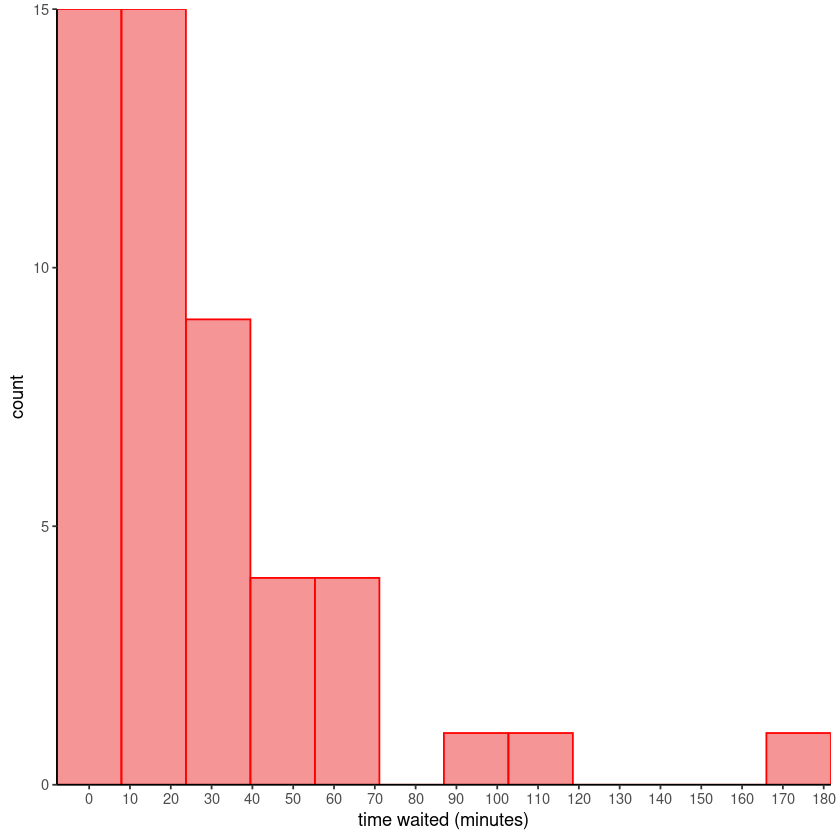

In [2]:
library("ggplot2")

l <- 1/30
n <- 50

time_until_doctor <- rexp(n, rate = l)

df_doc <- data.frame(x = time_until_doctor)

doctor_hist <- ggplot() +
            geom_histogram(data = df_doc, aes(x = time_until_doctor), color='red', fill='firebrick 2', alpha = 0.5, bins = 12)+
            theme_classic()+
            scale_x_continuous(name= 'time waited (minutes)', breaks = seq(0, 1000, 10),expand = c(0, 0))+
            scale_y_continuous(expand = c(0, 0))
doctor_hist

### B) what is the probability that a person will wait for less than 10 minutes ?

This can be answered:
1. mathematically using R's functions;
1. mathematically (from the theory of distributions), calculating explicitly the cumulative distribution;
2. by looking at the data we have at our disposal. With this method the probability will vary according to the particular data generation.

#### Mathematically  (let R do the math)
Specifically using the cumulative distribution function of the exponential distribution, and setting the cutoff value $ q = 10$: **pexp(q = 10, rate = l)**.


#### Mathematically  (theory)

$$F_{X}(x) = P(X \leq x)$$

Where F is the cumulative distribution function. In this case, since $X \sim Exp(\lambda)$: 

$$ F_{X}(x) = 1 - e^{-\lambda x}$$


#### Experimentally 
There exists a function in **R** that calculates the empirical cumulative distribution of a series of data points. 
The function is called **ecdf**. <br>
Firstly a variable is created by passing into **ecdf** the data vector (of which we want the cumulative distribution function). Then said variable is called with a number as an argument, that gives the empirical CDF at that value. For example: <br>

*P = ecdf(X)*    $~~~~~~$  #P is a function giving the empirical CDF of X<br>

*P(10)*           $~~~~~~$ # Empirical CDF at 10 minutes


In [3]:
#Mathematically with R

wait_lt_10_math_R <- pexp(q = 10, rate = l)
cat(paste('\n F(10) mathematically (in R) is: ', wait_lt_10_math_R))

# Mathematically

wait_lt_10_math <- 1-exp(-10*l)


cat(paste('\n F(10) mathematically is: ', wait_lt_10_math))

# Experimentally

P <- ecdf(time_until_doctor)

cat(paste('\n F(10) experimentally is: ', P(10)))



 F(10) mathematically (in R) is:  0.283468689426211
 F(10) mathematically is:  0.283468689426211
 F(10) experimentally is:  0.34

#### On the first run of the above cell i got results that are similar, however on different runs the experimental values can be drastically different. As a final check I can try and generate 10000 patients and verify that the results of both methods are consistent. 

In [4]:
time_until_doctor_10kpatients <- rexp(10000,l)

wait_lt_10_10k_math <- 1-exp(-10/30)

wait_lt_10_10k_math

P_10k <- ecdf(time_until_doctor_10kpatients)

P_10k(10)

[1] 0.2834687

[1] 0.2842

### c) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

This was done in 2 ways: 
1. experimentally, by taking the mean of the generated values
2. from the theory, by simply noting that if $X \sim Exp(\lambda)$, then $E(X) = \frac{1}{\lambda}$. In our case $\lambda = 1/30$, so $E(X) = 30$ minutes

In [5]:
#Experimentally

average_wait_experimentally <- sum(time_until_doctor)/length(time_until_doctor)
cat(paste('\n The average wait (in minutes), determined experimentally is: ', average_wait_experimentally))

#From the theory ---> 30 minutes

average_wait_math <- 1/l
cat(paste('\n The average wait (in minutes), determined analytically is: ', average_wait_math))



 The average wait (in minutes), determined experimentally is:  27.7576022874713
 The average wait (in minutes), determined analytically is:  30

### d) what is the probability for waiting more than one hour before being received ?

The probability of waiting for more than an hour can be written as: 

$$ P(X > 60) = 1-P(X \leq 60) = 1 - F_{X}(60)$$

So as before we can proceed mathematically (if we assume that the distribution is known) or experimentally. Of course we can also make R calculate the result from the theory by using **1 - pexp(q = 60, rate = l)** Below are the results from all three approaches. 

In [6]:
#Mathematically with R

wait_mt_60_math_R <- 1- pexp(q = 60, rate = l)
cat(paste('\n P(X>60) mathematically (with R) is: ', wait_mt_60_math_R))


# Mathematically

wait_mt_60_math <- 1-(1-exp(-60*l))

cat(paste('\n P(X>60) mathematically is: ', wait_mt_60_math))

# Experimentally

P <- ecdf(time_until_doctor)

cat(paste('\n P(X>60) experimentally is: ', 1- P(60)))



 P(X>60) mathematically (with R) is:  0.135335283236613
 P(X>60) mathematically is:  0.135335283236613
 P(X>60) experimentally is:  0.12

# Exercise 3

Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution:

### Plot the pdf and cdf

The poisson distribution is a discrete distribution with pmf: 

$$ p(k) = e^{-\lambda}\frac{\lambda^{k}}{k!}$$

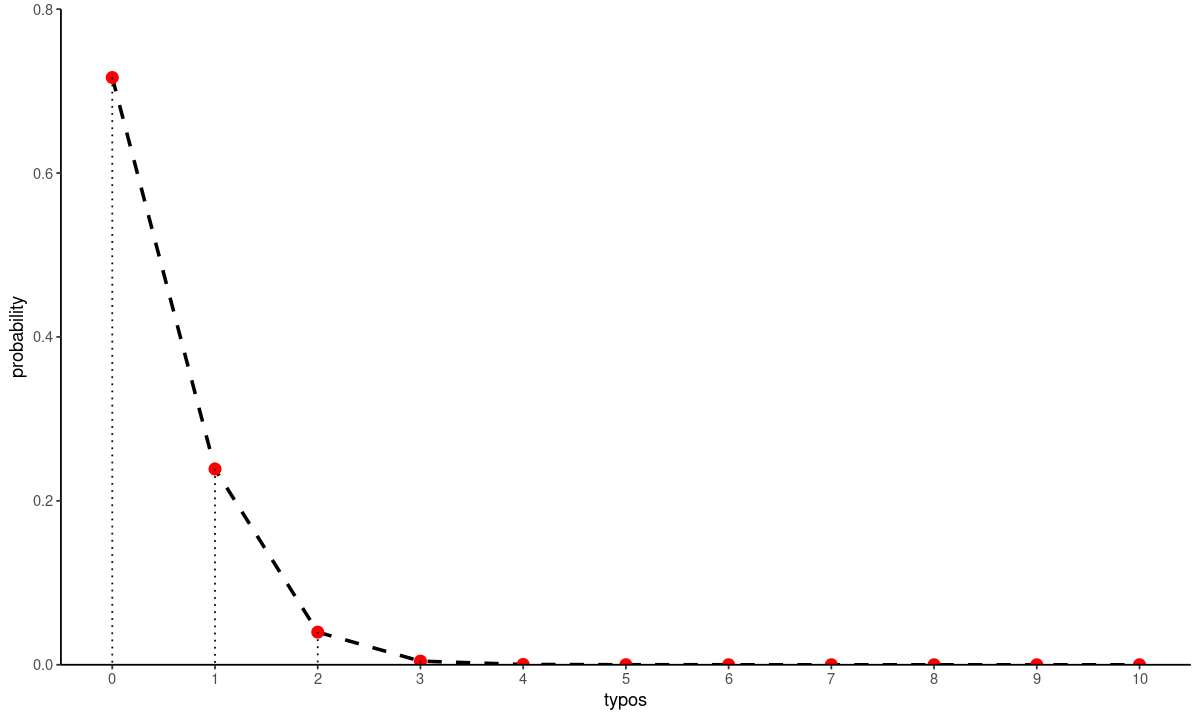

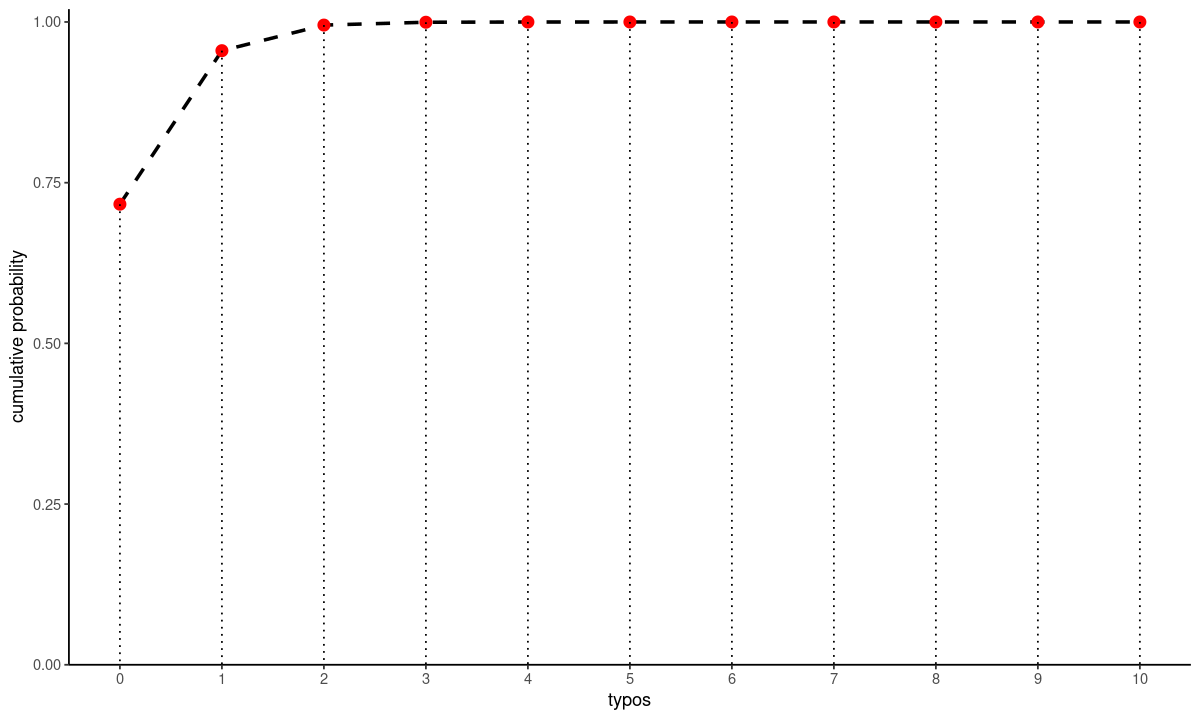

In [7]:
library("ggplot2")

x <- 0:10
pois_pdf <- dpois(x, 1/3)
pois_cdf <- ppois(x, 1/3)

df  <- data.frame(x, pois_pdf, pois_cdf)

options(repr.plot.width=10, repr.plot.height=6)

pdf_plot <- ggplot(df, aes(x=x, y=pois_pdf)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            geom_point(color='red', size = 3)+
            theme_classic()+
            scale_x_continuous(name= "typos", breaks = 0:10, expand = c(0.05, 0))+
            scale_y_continuous(name= "probability", expand = c(0, 0), limits = c(0, 0.8)) +
            geom_segment(aes(xend=x), yend=0, linetype = 'dotted') +
            expand_limits(y=0)

cdf_plot <- ggplot(df, aes(x=x, y=pois_cdf)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            geom_point(color='red', size = 3)+
            theme_classic()+
            scale_x_continuous(name= "typos", breaks = 0:10, expand = c(0.05, 0))+
            scale_y_continuous(name= "cumulative probability", expand = c(0, 0), limits = c(0, 1.02)) +
            geom_segment(aes(xend=x), yend=0,linetype = 'dotted') +
            expand_limits(y=0)




pdf_plot
cdf_plot

### Calculate the probability that there is at least one error on a specific page of the book
Note that in this exercise we are given a time-frame, in this way we can re-write the poisson distribution in the following way: 
$$ P(N(t) = n) = \frac{e^{-\lambda t}(\lambda t)^{n}}{n!}$$
The parameter lambda is equal to \(1\), and $t$ is measured in units of $3$ pages, so: 
$$ P(N(t) = n) = \frac{e^{-t}t^{n}}{n!}$$

In this way the probability we're interested in can be calculated with the following: 
$$ P \left[N\left(\frac{1}{3}\right) > 0 \right] = 1 - P \left[N\left(\frac{1}{3}\right) = 0 \right]$$

which gives : 
$$P \left[N\left(\frac{1}{3}\right) > 0 \right] =  1- \frac{e^{-1/3}\frac{1}{3}^{0}}{0!} = 0.283468$$


In [8]:
at_least_one_typo <- 1 - ppois(0, 1/3)
cat(paste('The probability of having at least one typo on a specific page is: ', at_least_one_typo))

The probability of having at least one typo on a specific page is:  0.283468689426211

# Exercise 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.


If  $E$ is the event of drawing an ace from a deck of 52 cards, then $P(E) = \frac{4}{52}$, given that we draw cards with replacement this probability remains the same throughout all repeated experiments. 

Since we're interested the first "success" (i.e. the first ace drawn) the question is best approached by using the geometric distribution. The geometric distribution assigns a probability to the event $P(X = x)$ ($X$ (trial of first success) = $\#x$) which is:

$$ P(X = x) = (1-p)^{x-1}p  ~~~~~~p = 4/52$$

The cumulative distribution of the geometric distribution is: 

$$ F_{X}(x) = P(X < x) = 1 - (1-p)^{x} $$

And so the probability that **at least** 10 draws  (included) are needed is: 

$$ P(X \geq 10 ) = 1 - F_{X}(10) = 1 - (1 - (1-4/52)^{10}) = (1-4/52)^{10} = 0.4491$$ 

#### In R

To do this in R we need to use the **p** method (cumulative distribution function). The **p** method returns the area to the left of the specified quantile/cutoff. The calculation is in the cell below:


In [9]:
# pgeom function finds the probability of experiencing a certain amount of failures 
# or less before experiencing the first success in a series of Bernoulli trials 
# so we need to input q = 9 if 10 is included

p <- 4/52

p_geq_10_draws <- 1 - pgeom(q = 9, p = p)

cat(paste('The probability that at least 10 draws are needed before drawing an ace from a deck is: ', p_geq_10_draws))

The probability that at least 10 draws are needed before drawing an ace from a deck is:  0.449137107141863

# Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form: 

$$ f(X) = \begin{cases} c~(t-1)~(2-t) ~~~ 1 < t < 2 \\
0 ~~~ otherwise \end{cases}$$

### a) using the integrate() R function, determine the constant c (and verify it analytically)

The density needs to be normalized, so before calculating with R let us determine the constant c analytically: 
$$ \int_{1}^{2} c~(t-1)~(2-t)~ dt := 1$$
$$ c \int_{1}^{2} (2t -2 -t^{2} +t) ~dt := 1 $$
$$ c \left[ \frac{2}{2}t^{2} - 2t - \frac{1}{3}t^{3} + \frac{1}{2}t^{2}\right]_{1}^{2} : = 1 $$
$$ c \left[ (4 - 4 - \frac{8}{3} + 2) - (1 -2 -\frac{1}{3} + \frac{1}{2})\right] := 1 $$
$$ \implies c = 6 $$


In [10]:
tolc_times_unknown_c <- function(x){
    res <- ifelse((x >= 1 & x <= 2), (x-1)*(2-x), 0)
    return (res)
}

integral_R <- integrate(tolc_times_unknown_c, lower = 1, upper = 2)
c <- 1/integral_R$value

cat(paste('The constant c according to R should be: c = ', c))


The constant c according to R should be: c =  6

### b) write the set of four R functions and plot the pdf and cdf, respectively

#### density - d

In order to write this function we just need to translate into **R** the following: 
$$ f(X) = \begin{cases} 6~(t-1)~(2-t) ~~~ 1 < t < 2 \\
0 ~~~ otherwise \end{cases}$$

This is easily accomplished, note that I have vectorized the function, this means that it can also take vectors as arguments. The output of the vectorized function is a vector of the same lenght as the input where each element is the
result of the function applied to the "same indexed" input element.

In [11]:
# Density

d_tolc <- function(x){
    res <- ifelse( (x > 1 & x < 2), 6*(x-1)*(2-x), 0)
    return (res)
}

d_tolc <- Vectorize(d_tolc)

#### cumulative - p

From the theory of distributions we know that once the cumulative distribution function of a probability distribution can be calculated starting from the density by integrating up to the desidered cutoff, i.e.: 

$$ F_{X}(x) = \int_{-\infty}^{x} f_{X}(t) dt $$
Where: 
1. $X$ is the "name" of the random variable
2. $x$ is the value at which we want to calculate the cumulative distribution function
3. $t$ is a mute/dummy integration variable

So in order to calculate the cdf I just need to write the following 3 equations in R:

$$F_{X}(x)= 
\begin{cases}
0 & x\leq 1\\
\int_{1}^{x} 6~(t-1)~(2-t)~dt & 1<x<2\\
1 & x \geq 2 \\
\end{cases}$$

In [12]:
# Cumulative 

p_tolc <- function(x) {
    cum_res <- ifelse( (x>1 & x<2), integrate(d_tolc,1,x)$value, ifelse(x <= 1, 0, 1) )
    return (cum_res)
}

p_tolc <- Vectorize(p_tolc)

#### quantile - q

The quantile function is the inverse of the cumulative distribution.<br>
The cdf takes as input a measurement (cutoff value) and gives the cumulative probability of getting a value less than or equal to the cutoff.
The quantile function takes as input a probability and gives the cutoff value for which the probability does not exceed the inputted probability.

In [13]:
library("GoFKernel") # need this to inverse cdf

# Quantile 

q_tolc <- inverse(p_tolc, 1, 2)  

q_tolc <- Vectorize(q_tolc)


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



#### random number generator - r

One way to generate random numbers according to a certain distribution is the following: 
1. Given a cdf $F_{x}(x)$, invert it and find $F^{-1}(t)$
2. Generate a number $ u \sim U[0,1]$
3. The random number $\sim X$ is $F^{-1}(u)$

In [14]:
library("GoFKernel") # need this to inverse cdf

# Random number generator

r_tolc <- function(N, cum, inf, sup) {
    u <- runif(N)
    r_res <- Vectorize(inverse(cum, inf, sup))
    return (r_res(u))
}

### Plot pdf and cdf (also shown is a data generation using r_tolc)

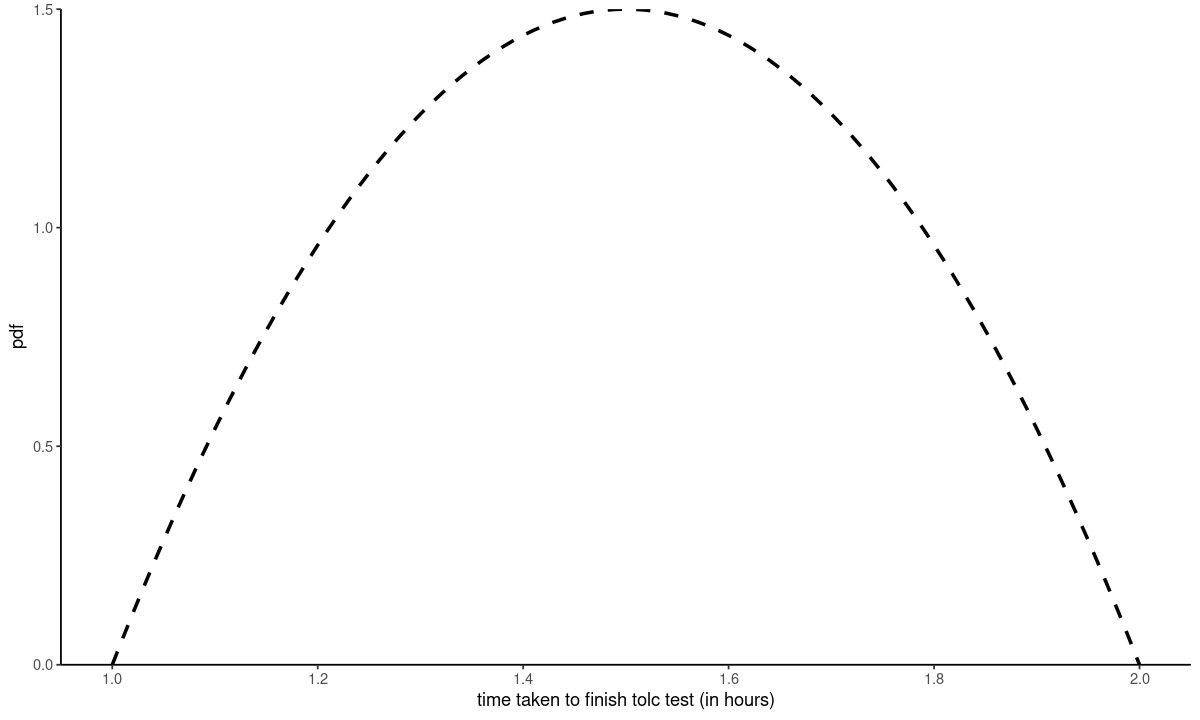

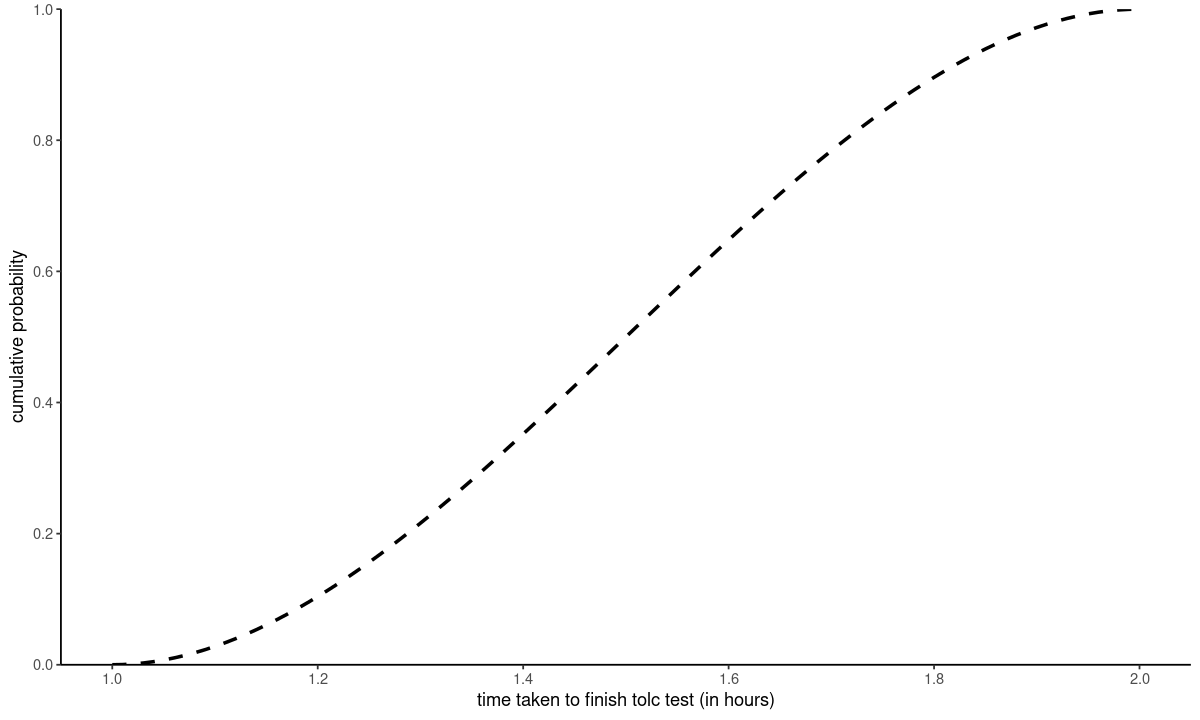

In [15]:
x = seq(1,2,0.01)
df_tolc  <- data.frame(x, d_tolc(x), p_tolc(x))

options(repr.plot.width=10, repr.plot.height=6)


pdf_plot_tolc <- ggplot(df_tolc, aes(x=x, y=d_tolc.x.)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "time taken to finish tolc test (in hours)", breaks = seq(1,2,0.2), expand = c(0.05, 0))+
            scale_y_continuous(name= "pdf", expand = c(0, 0)) +
            expand_limits(y=0)




cdf_plot_tolc <- ggplot(df_tolc, aes(x=x, y=p_tolc.x.)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "time taken to finish tolc test (in hours)", breaks = seq(1,2,0.2), expand = c(0.05, 0))+
            scale_y_continuous(name= "cumulative probability", expand = c(0, 0), breaks = seq(0,1,0.2)) +
            expand_limits(y=0)



pdf_plot_tolc
cdf_plot_tolc


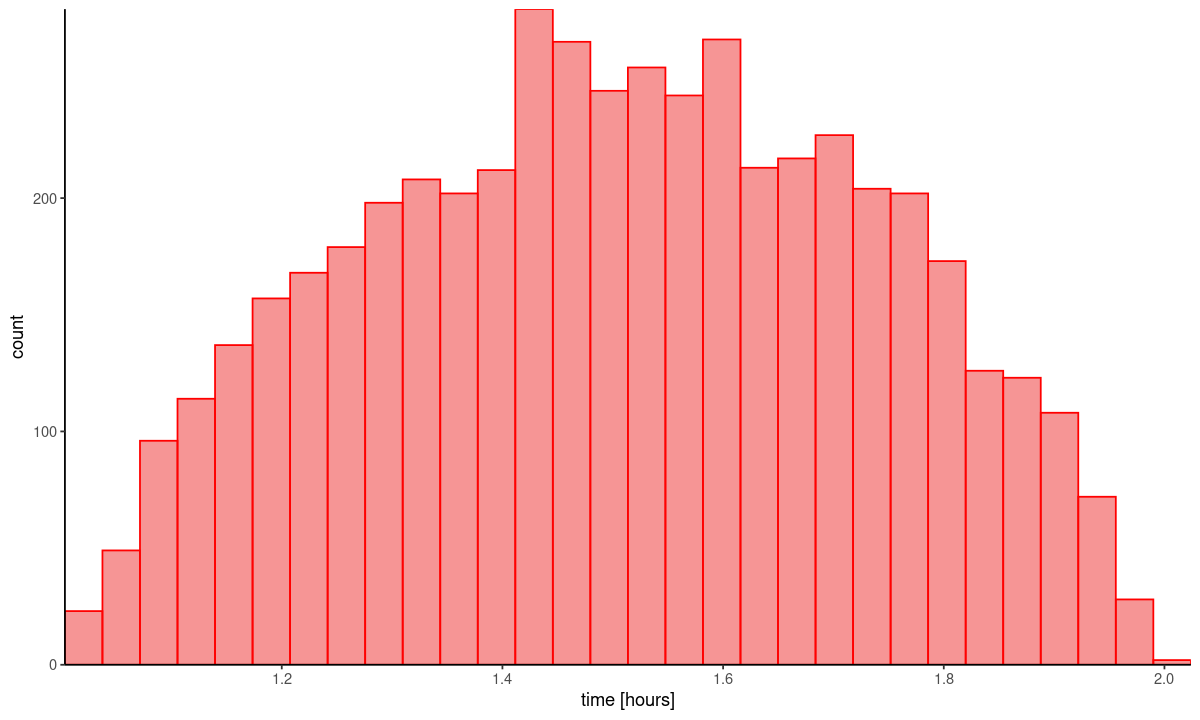

In [16]:
random_test_times <- r_tolc(5000, p_tolc, 1,2)
df_gen <- data.frame(x = random_test_times)

r_hist <- ggplot() +
            geom_histogram(data = df_gen, aes(x = random_test_times), color='red', fill='firebrick 2', alpha = 0.5, bins = 30)+
            theme_classic()+
            scale_x_continuous(name= "time [hours]", breaks = seq(1, 2, 0.2), expand = c(0, 0))+
            scale_y_continuous(expand = c(0, 0))
r_hist

### c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.

The probability that the student will finish the aptitude test in more than 75 minutes is just: 

$$ P(X > 75/60) = 1 - F_{X}(75/60)$$ 

The probability that the student will take between 90 and 120 minutes is just: 

$$ P(90/60 < X < 120/60) = F_{X}(120/60) - F_{X}(90/60)$$ 


In [17]:
time_mt_75_min <- 1- p_tolc(75/60)

cat(paste('\n P(X > 75 min) = ', time_mt_75_min))

time_90btw120_min <- p_tolc(120/60) - p_tolc(90/60)

cat(paste('\n P(90 min < X < 120 min) = ', time_90btw120_min))


 P(X > 75 min) =  0.84375
 P(90 min < X < 120 min) =  0.5

# Exercise 6

### the lifetime of tires sold by an used tires shop is $10^{4} ·x$ km, where x is a random variable following the distribution funcion

$$ f(X) = \begin{cases} 2/x^{2} & 1 <x<2 \\ 0 & otherwise \end{cases} $$

Let's check normalization.

In [18]:
tires_unknown_c <- function(x){
    res <- ifelse((x > 1 & x < 2), 2/(x*x), 0)
    return (res)
}

integral_R <- integrate(tires_unknown_c, lower = 1, upper = 2)
c <- 1/integral_R$value

cat(paste('The constant c according to R should be: c = ', c))


The constant c according to R should be: c =  1

### a) write the set of four R functions and plot the pdf and cdf, respectively

This explanation of this point mirrors the explanation in the previous exercise. 

In [19]:
library("GoFKernel")

#Density

d_tires <- function(x){
    res <- ifelse( (x > 1 & x < 2), 2/(x*x), 0)
    return (res)
}

d_tires <- Vectorize(d_tires)


#Cumulative 

p_tires <- function(x) {
    cum_res <- ifelse( (x>1 & x<2), integrate(d_tires,1,x)$value, ifelse(x <= 1, 0, 1) )
    return (cum_res)
}

p_tires <- Vectorize(p_tires)

# Quantile 

q_tires <- inverse(p_tires, 1, 2)  

q_tires <- Vectorize(q_tires)

# Random number generator

r_tires <- function(N, cum, inf, sup) {
    u <- runif(N)
    r_res <- Vectorize(inverse(cum, inf, sup))
    return (r_res(u))
}




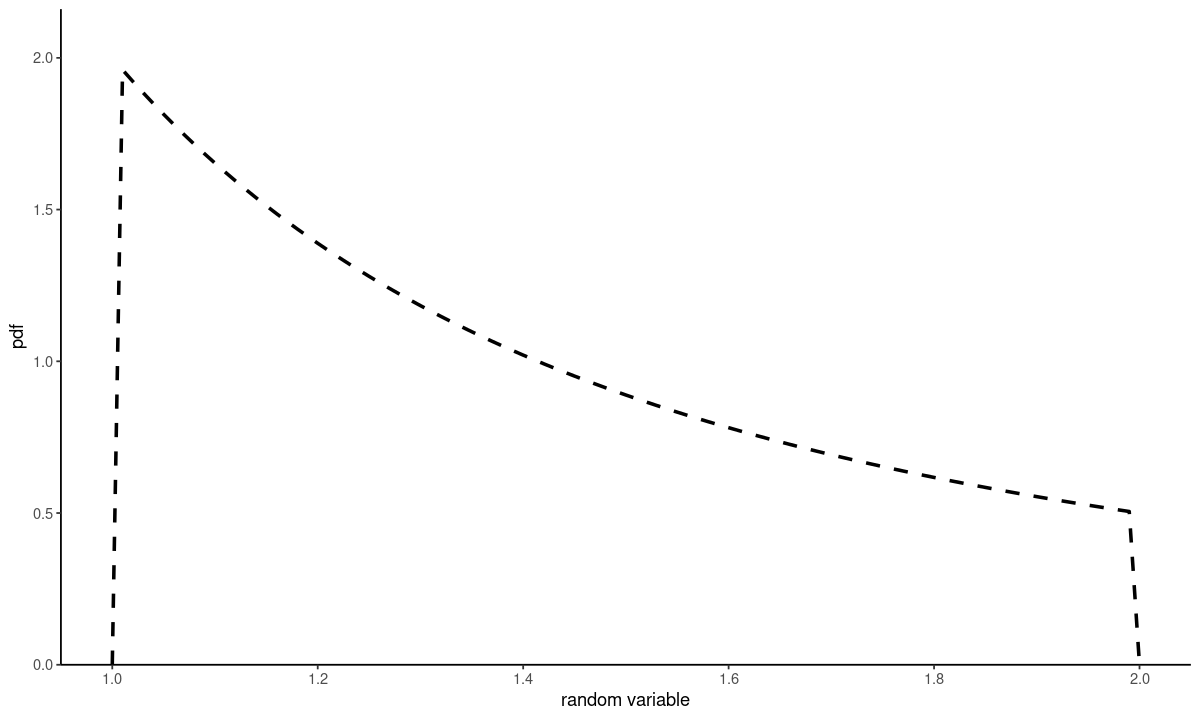

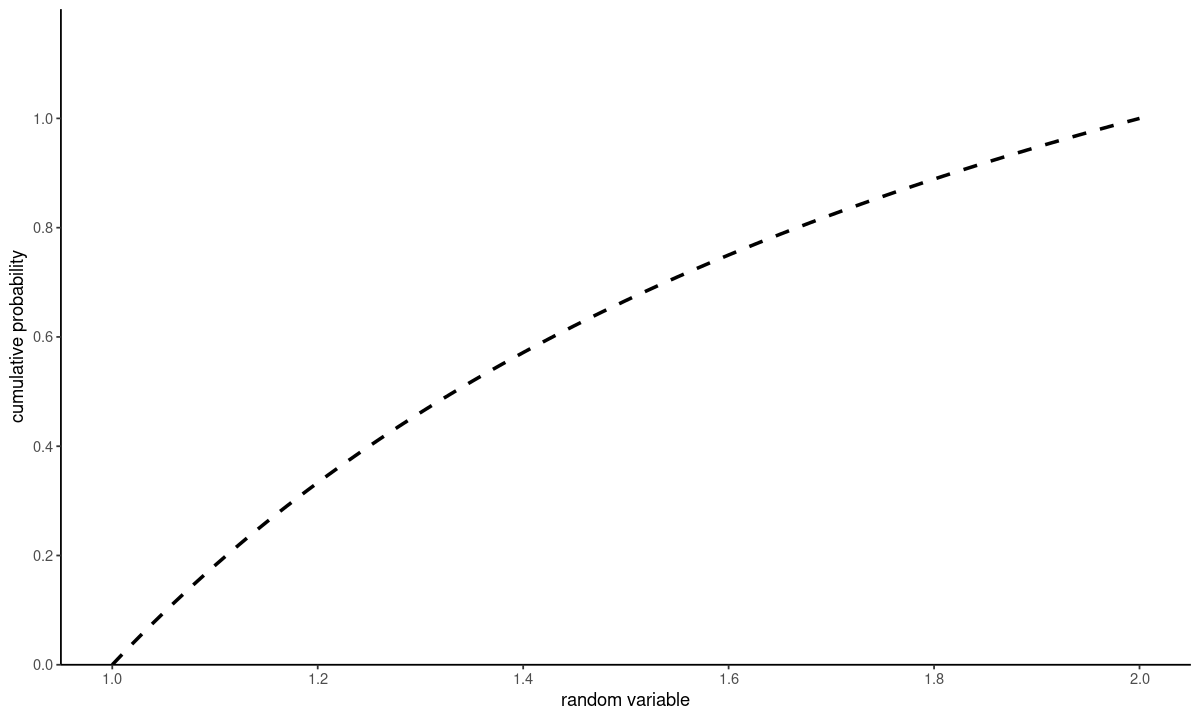

In [20]:
library("ggplot2")

x = seq(1,2,0.01)
df_tires  <- data.frame(x, d_tires(x), p_tires(x))

options(repr.plot.width=10, repr.plot.height=6)


pdf_plot_tires <- ggplot(df_tires, aes(x=x, y=d_tires.x.)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "random variable", breaks = seq(1,2,0.2), expand = c(0.05, 0))+
            scale_y_continuous(name= "pdf", expand = c(0, 0), limits = c(0, max(d_tires(x))+0.2)) +
            expand_limits(y=0)




cdf_plot_tires <- ggplot(df_tires, aes(x=x, y=p_tires.x.)) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "random variable", breaks = seq(1,2,0.2), expand = c(0.05, 0))+
            scale_y_continuous(name= "cumulative probability", expand = c(0, 0), limits = c(0, 1.2), breaks = seq(0,1,0.2)) +
            expand_limits(y=0)



pdf_plot_tires
cdf_plot_tires


### b) determine the probability that tires will last less than 15000 km

The probability that the tires will last less than $15000~km$ is: 
$$ P(X < 1.5) = F_{X}(1.5) $$

So it is determinable using the cumulative distribution function that I have defined previously **p_tires**.

In [21]:
tires_lt_15kk <- p_tires(1.5)

cat(paste('\n P(X < 15000 km) = ', tires_lt_15kk))


 P(X < 15000 km) =  0.666666666666667

### c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $ Var[X] = E[X^{2}] - E[X]^{2}$

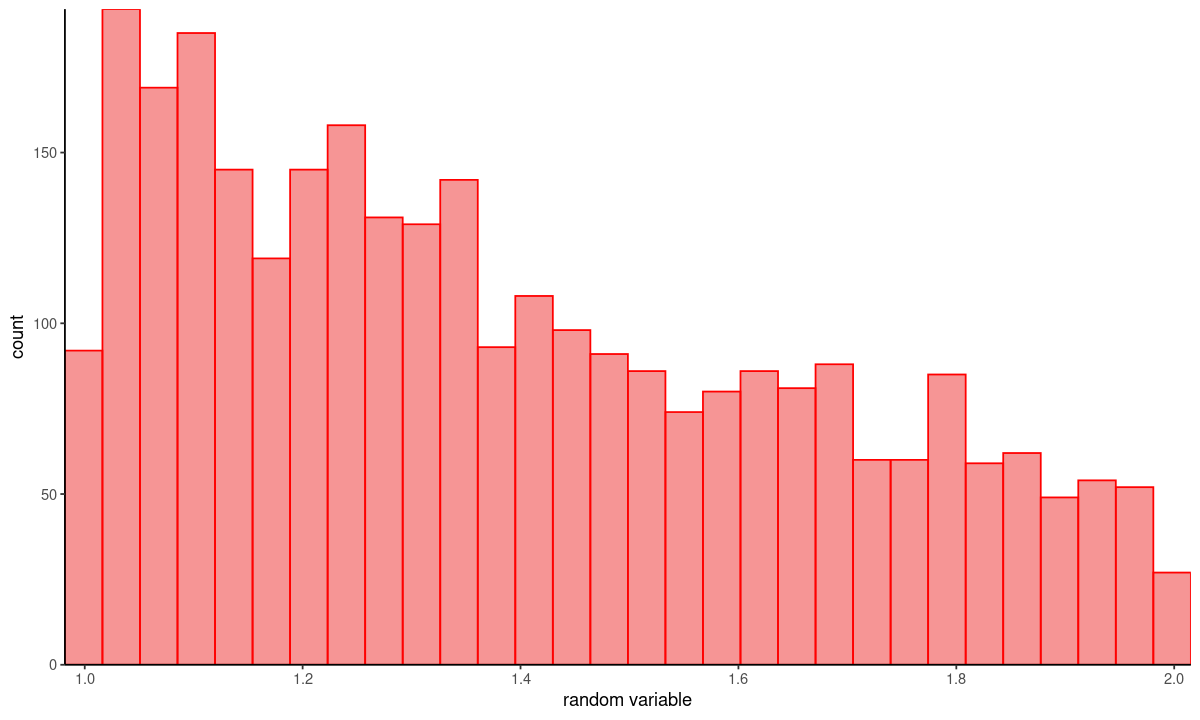

In [22]:
random_tires <- r_tires(3000, p_tires, 1,2)
df_gen_tires <- data.frame(x = random_tires)


r_hist_tires <- ggplot() +
            geom_histogram(data = df_gen_tires, aes(x = random_tires), color='red', fill='firebrick 2', alpha = 0.5, bins = 30)+
            theme_classic()+
            scale_x_continuous(name= "random variable", breaks = seq(1, 2, 0.2), expand = c(0, 0))+
            scale_y_continuous(expand = c(0, 0))
r_hist_tires

In [23]:
exp_x <- integrate(function(x) {x*d_tires(x)}, 1, 2)
exp_x2 <- integrate(function(x) {x*x*d_tires(x)}, 1, 2)

var <-  exp_x2$value - (exp_x$value^2)

cat(paste("\n E[X] (theory)", exp_x$value))
cat(paste("\n Var[X] (theory):", var))

var_calc <- mean(random_tires^2) - (mean(random_tires)^2)

cat(paste("\n E[X] (experimental)", mean(random_tires)))
cat(paste("\n Var[X](experimental)", var_calc))


 E[X] (theory) 1.38629436111989
 Var[X] (theory): 0.0781879443271938
 E[X] (experimental) 1.38813070669522
 Var[X](experimental) 0.0769687110895276